<a href="https://colab.research.google.com/github/hsargoli/MyWorks/blob/main/images_haarCasCade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

face detection with openCv: cascading method

[link](https://pyimagesearch.com/2021/04/12/opencv-haar-cascades/)

the algorithm break the task of identify the face into thousands of smaller bit sized tasks which is easy to solve (these tasks called classifier)

In [ ]:
import matplotlib.pyplot as plt
import cv2
path = '/content/drive/MyDrive/path/sample_image/positive/*.jpg'
path2 = '/content/drive/MyDrive/path/sample_image/negative/*.jpg'
path3 = '/content/drive/MyDrive/images/vsi2.jpg'
path4 = '/content/drive/MyDrive/images/vsi3.jpg'
path5 = '/content/drive/MyDrive/images/vsi4.jpg'
path6 = '/content/drive/MyDrive/images/vsiextend.jpg'
path7 = '/content/drive/MyDrive/images/forF1.jpg'


face 0
top left x: 101  y: 28,	 down right  x 137  y   64 
face 1
top left x: 190  y: 40,	 down right  x 230  y   80 
face 2
top left x: 25  y: 17,	 down right  x 67  y   59 
[[101  28  36  36]
 [190  40  40  40]
 [ 25  17  42  42]]


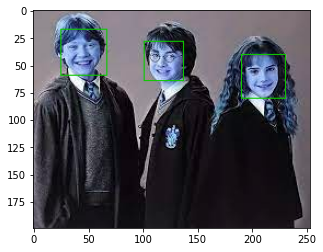

In [ ]:

detector = cv2.CascadeClassifier('/content/drive/MyDrive/haarcascade_frontalface_default.xml')
c = cv2.imread('/content/drive/MyDrive/images/harry.jpg')
results = detector.detectMultiScale(
		c, scaleFactor=1.05, minNeighbors=5,
		minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE)
for i in range(len(results)):
  a = results[i]
  lux = a[0]
  luy = a[1]
  ldx = a[0] + a[2]
  ldy = a[1] + a[3]
  print(f'face {i}\ntop left x: {lux}  y: {luy},\t down right  x {ldx}  y   {ldy} ')
  cv2.rectangle(c, pt1=(lux,luy), pt2=(ldx,ldy), color=(13,200,0), thickness=1)
  del a
print(results)
plt.imshow(c)
plt.show()

(286, 150, 150) (150, 150)


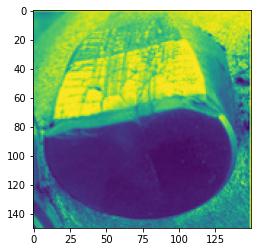

In [ ]:
#from haarSg import SGhaar2

a = SGhaar2()

c = a.reader('/content/drive/MyDrive/path/DATASET/W *.jpg')
h = []
c.shape[0]

print(c.shape,c[0].shape)
plt.imshow(c[0])


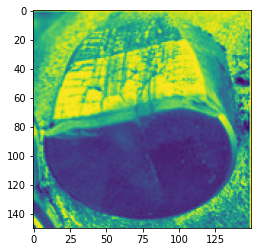

In [ ]:
# histogram equalization

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(c[0])
plt.imshow(cl1)
def histE(image):
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  cl1 = clahe.apply(image)
  return cl1


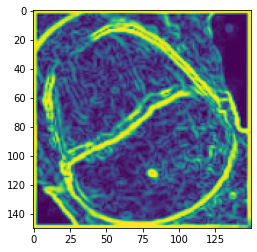

In [ ]:
CC = []
for i in c:
  a = histE(i)
  CC.append(a)
plt.imshow(CC[20])

In [ ]:
for i in range(len(c)):
  z = a.integral_image(c[i])
  h.append(z)
  

NameError: ignored

In [ ]:
import numpy as np
import sys 

integral_dataset = np.array(h)
savearr = integral_dataset.reshape(integral_dataset.shape[0],-1)
#np.savetxt('haarInteg.csv', savearr, delimiter = ',')
print(f'size of integral images of all img {sys.getsizeof(integral_dataset)} \
       with shape of {integral_dataset.shape} ')

NameError: ignored

In [ ]:
a = SGhaar2()
z = [] # features stored in z
for i in integral_dataset:
  c = a.doAll_one_image(i)
  z.append(c)
  
z = np.array(z)
z


NameError: ignored

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=4,                           n_informative=2, n_redundant=0,
                          random_state=0, shuffle=False)

clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)
print(clf.predict([[0, 0, 0, 0]]),clf.score(X, y))

[1] 0.983


In [ ]:
y.shape

(1000,)

In [ ]:
#############################################################################    
#############################################################################
#############################################################################
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt

class SGhaar2:
  def __init__(self):
    pass

  def doAll_one_image(self,img): # we have to apply normilize and integral method First Then input them into it FUNC
    
    z = np.copy(img)
    #img = self.norm(img)
    #z = self.integral_image(img)
    stx = 8
    sty = 24
    ccF1 = self.haarF1(z,stx,sty)
    ccF2 = self.haarF2(z,sty,stx)
    ccF3 = self.haarF3(z,stx,sty)
    ccF4 = self.haarF4(z,stx,stx)
    all = np.array((ccF1, ccF2, ccF3, ccF4))
    return all
##############################################    
  def doF1(self,path):
    img = cv2.imread(path, 0)
    #print(img)
    img = self.norm(img)
    z = self.integral_image(img)
    stx = 2
    sty = 6
    ccF1 = self.haarF1(z,stx,sty)
    self.drawF1(img,stx, sty)
    return ccF1
##############################################   
  def doF2(self,path):
    img = cv2.imread(path, 0)
    #print(img)
    img = self.norm(img)
    z = self.integral_image(img)
    stx = 2
    sty = 6
    ccF2 = self.haarF2(z,sty,stx)

    self.drawF2(img,stx,sty)
    return ccF2
##############################################   
  def integral_image(self, aimg):
    aimg = self.norm(aimg)
    x, y = aimg.shape
    Nimg = np.zeros([x,y])
    for i in range(x):
      xrow = []
      for j in range(y):
        a = aimg[:i,:j+1]
        xrow.append(aimg[i][j])
        Nimg[i][j] = sum(xrow) + np.sum(a)
      del xrow
    return Nimg
############################################## sum_window
  def sum_window(self, integral_image, initx, inity,w ,h):
    try:
      init_point = integral_image[initx, inity]
      down_right = integral_image[initx + h, inity + w]
      if initx == inity == 0:
        return down_right

      if inity == 0:
        top_right =  integral_image[initx -1, inity + w]
        return   down_right - top_right

      if initx == 0:
        down_left =  integral_image[initx + h ,inity -1]
        return down_right - down_left

      top_right =  integral_image[initx -1, inity + w]
      down_left =  integral_image[initx + h ,inity -1]
      top_left  =  integral_image[initx -1, inity-1]
      box_sum = down_right + top_left - top_right - down_left
      #print(f'down_right {down_right}  top_left {top_left}  top_right {top_right}   down_left{down_left} ')
      return box_sum
    except:
      wimage, himage = integral_image.shape
      if w + initx > wimage :
        return False
      if h + inity >himage:
        return False   
##############################################  haarF1
#loooooooooooooooooooooooooooooooooooooooooooo

  def haarF1(self, img, stridey, stridex):
      stridex -= 1
      stridey -= 1
      assert stridex or stridey == 0, 'raise stride'
      self.what = []
      w, h = img.shape
      tetaTh = 0.5
      for i in range(0, w, int(stridex/2)):  # walk in rows
          for j in range(0, h, stridey + stridex): # walk in columns

              aw = i + stridey + 1
              t11 = self.sum_window(img, i, j, stridex, stridey)
              t12 = self.sum_window(img, aw, j, stridex, stridey)



              #print(t11,t12,'----',' i',i, aw,'j', j,'   ',stridex, stridey)
              windows_size = (stridex + 1) * (stridey + 1)

              if t11 and t12:
                  miu1 = t11 / windows_size
                  miu2 = t12 / windows_size
                  teta = miu2 - miu1
                  if teta > tetaTh:
                      #print(f"type 1 haar feature in index{j,i} \tthreshold:{(tetaTh,teta)}")
                      self.what.append([j,i,1])  
      return self.what       

 
  def haarF2(self, img, stridey, stridex):
      stridex -= 1
      stridey -= 1
      assert stridex or stridey == 0, 'raise stride'
      self.what2 = []
      w, h = img.shape
      tetaTh = 0.5
      for i in range(0, h, int(stridey/2)):  # walk in  columns
          for j in range(0, w, stridex +  stridey): # walk in rows

              aw = j + stridex + 1
              t11 = self.sum_window(img, i, j, stridex, stridey)
              t12 = self.sum_window(img, i, aw, stridex, stridey)


              #print(t11,t12,'----',' i',i,'j', j, aw ,'   ',stridex, stridey)
              windows_size = (stridex + 1) * (stridey + 1)

              if t11 and t12:
                  miu1 = t11 / windows_size
                  miu2 = t12 / windows_size
                  teta = miu2 - miu1
                  if teta > tetaTh:
                      #print(f"type 2 haar feature in index{j,i} \tthreshold:{(tetaTh,teta)}")
                      self.what2.append([j,i,2])  
      return self.what2  

 

##############################################
  def norm(self,image):
    pixels = np.asarray(image)
    pixels = pixels.astype('float32')
    pixels /= 255.0
    return pixels
##############################################
  def reader(self,path):
    a =[]
    for i in glob.glob(path, recursive = True):
      oo = cv2.imread(i,0)
      a.append(oo)
    a = np.array(a)
    return a
##############################################  
  def drawF1(self, img, stx, sty):
    assert self.what != False, 'empty features'
    copy_img = np.copy(img)
    for i in range(len(self.what)):
      stp1 = self.what[i][:2][0]
      stp2 = self.what[i][:2][1]
      cv2.rectangle(copy_img,pt1 = (stp1,stp2), pt2 = (stp1 +sty, stp2 +stx), color=(255,0,0), thickness=1)

    ccc = np.zeros_like(copy_img[:,1])
    ccc = ccc.reshape((-1,1))
    h = np.hstack((copy_img,ccc,ccc, img))
    plt.imshow(h)
##############################################  
  def drawF2(self, img, stx, sty):
    assert self.what2 != False, 'empty features'
    copy_img = np.copy(img)
    for i in range(len(self.what2)):
      stp1 = self.what2[i][:2][0]
      stp2 = self.what2[i][:2][1]
      cv2.rectangle(copy_img,pt1 = (stp1,stp2), pt2 = (stp1 +stx, stp2 +sty), color=(255,0,0), thickness=1)

    ccc = np.zeros_like(copy_img[:,1])
    ccc = ccc.reshape((-1,1))
    h = np.hstack((copy_img,ccc,ccc, img))
    plt.imshow(h)


##############################################
  def haarF3(self, img, stridey, stridex):
      stridex -= 1
      stridey -= 1
      assert stridex or stridey == 0, 'raise stride'
      self.what3 = []
      w, h = img.shape
      tetaTh = 0.5
      for i in range(0, w, stridex):  # walk in rows
          for j in range(0, h, stridey): # walk in columns

              second_window = i + stridey +1
              third_window = second_window + stridey + 1
              t11 = self.sum_window(img, i, j, stridex, stridey)
              t12 = self.sum_window(img, second_window, j, stridex, stridey)
              t13 = self.sum_window(img, third_window, j, stridex, stridey)

              #print(i, j, t11,'\t',second_window,j,t12,'\t',third_window, j, t13)
              windows_size = (stridex + 1) * (stridey + 1)
              
              if t11 and t12:
                  miu1 = t11 / windows_size
                  miu2 = t12 / windows_size
                  miu3 = t13 / windows_size
                  teta = miu3 - miu1 + miu2
                  if teta > tetaTh:
                      #print(f"type 3 haar feature in index{j,i} \tthreshold:{(tetaTh,teta)}")
                      self.what3.append([j,i,3])  
      return self.what3
##############################################
  def drawF3(self,img,stx,sty):
    assert self.what3 != False, 'empty features'
    copy_img = np.copy(img)
    for i in range(len(self.what3)):
      stp1 = self.what3[i][:2][0]
      stp2 = self.what3[i][:2][1]
      #cv2.rectangle(copy_img,pt1 = (stp1,stp2), pt2 = (stp1 +sty, stp2 +stx), color=(100,100,10), thickness=1)
      copy_img[stp1:stp1 + stx] = 0
      copy_img[stp2:stp2 + sty] = 0
    ccc = np.zeros_like(copy_img[:,1])
    ccc = ccc.reshape((-1,1))
    h = np.hstack((copy_img,ccc,ccc, img))
    plt.imshow(h)
##############################################
  def haarF4(self, img,stridey, stridex):
      stridex -= 1
      stridey -= 1
      assert stridex or stridey == 0, 'raise stride'
      self.what4 = []
      w, h = img.shape
      tetaTh = 0.5
      for i in range(0, w, stridex):  # walk in rows
          for j in range(0, h, stridey): # walk in columns

              second_window = j + stridey + 1
              third_window = i + stridex + 1

              t11 = self.sum_window(img, i, j, stridex, stridey)
              t12 = self.sum_window(img, i, second_window, stridex, stridey)
              t13 = self.sum_window(img, third_window, j, stridex, stridey)
              t14 = self.sum_window(img, third_window, second_window, stridex, stridey)
              #print(i, j, t11,'\t',i,second_window,t12,'\t',third_window, j, t13,'\t',third_window, second_window, t14)
              windows_size = (stridex + 1) * (stridey + 1)

              if t11 and t12 and t13 and t14:
                  miu1 = t11 / windows_size
                  miu2 = t12 / windows_size
                  miu3 = t13 / windows_size
                  miu4 = t14 / windows_size
                  teta = (miu3 + miu2) - (miu1 + miu4)
                  if teta > tetaTh:
                      #print(f"type 4 haar feature in index{j,i} \tthreshold:{(tetaTh,teta)}")
                      self.what4.append([j,i,4])
      return self.what4


In [ ]:
import cv2
a = SGhaar2()

# img = cv2.imread(path3, 0)
img = cv2.imread('/content/drive/MyDrive/images/vsi2.jpg', 0)
# img = a.norm(img)
z = a.integral_image(img)
a.doAll_one_image(z)


array([], shape=(4, 0), dtype=float64)

In [ ]:
a.haarF3(z,2,4)

type 3 haar feature in index(0, 0) 	threshold:(0.2, 31.625)
type 3 haar feature in index(1, 0) 	threshold:(0.2, 30.0)
type 3 haar feature in index(2, 0) 	threshold:(0.2, 32.0)
type 3 haar feature in index(3, 0) 	threshold:(0.2, 93.25)


[[0, 0, 3], [1, 0, 3], [2, 0, 3], [3, 0, 3]]

In [ ]:
a.haarF4(z,2,2)

type 4 haar feature in index(2, 0) 	threshold:(0.2, 66.0)
type 4 haar feature in index(0, 1) 	threshold:(0.2, 63.5)
type 4 haar feature in index(0, 2) 	threshold:(0.2, 63.25)
type 4 haar feature in index(1, 2) 	threshold:(0.2, 63.0)


[[2, 0, 4], [0, 1, 4], [0, 2, 4], [1, 2, 4]]

In [ ]:
img

array([[  9,   9,   0,   9,   2,   6,   9],
       [  0,   0,   1,   0,  19,   3, 139],
       [  1,   1,   0, 255,   0,  10, 255],
       [  0,   1,   1,   0,   0,   2, 128],
       [  0,   0,   0,   0,   0,  14, 255],
       [  2,   9,   2,   9,   2,   1,   2]], dtype=uint8)

In [ ]:
a = SGhaar2()
img = cv2.imread(path6, 0)
img = a.norm(img)
z = a.integral_image(img)
a.haarF1(z,2,4)

[]

[[0, 6, 1], [6, 6, 1], [12, 6, 1], [18, 6, 1], [12, 16, 1]]

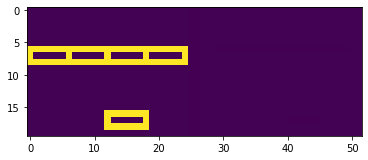

In [ ]:
a = SGhaar2()
a.doF1('/content/drive/MyDrive/images/forF1.jpg')

[[6, 0, 2],
 [18, 0, 2],
 [6, 2, 2],
 [18, 2, 2],
 [6, 4, 2],
 [18, 4, 2],
 [6, 6, 2],
 [18, 6, 2],
 [6, 8, 2],
 [6, 10, 2],
 [12, 10, 2],
 [6, 12, 2],
 [12, 12, 2],
 [12, 14, 2]]

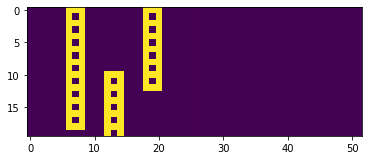

In [ ]:
a = SGhaar2()
a.doF2('/content/drive/MyDrive/images/forF2.jpg')

In [ ]:
import cv2
a = SGhaar2()
img = cv2.imread(path5, 0)
img = a.norm(img)
z = a.integral_image(img)
a.haarF1(z,3,4)


[[5, 4, 1],
 [10, 5, 1],
 [15, 10, 1],
 [15, 11, 1],
 [5, 12, 1],
 [10, 12, 1],
 [15, 12, 1],
 [5, 13, 1],
 [10, 13, 1],
 [10, 14, 1]]

In [ ]:
np.savetxt('test.csv', img, delimiter=',',fmt='%1.0e')

In [ ]:
array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2])

In [ ]:

import glob
import cv2
import numpy as np
def reader(path):
  a =[]
  for i in glob.glob(path, recursive = True):
    oo = cv2.imread(i,0)
    a.append(oo)
  a = np.array(a)
  return a
path = '/content/drive/MyDrive/path/sample_image/positive/*.jpg'
path2 = '/content/drive/MyDrive/path/sample_image/negative/*.jpg'
pos = reader(path)

neg = reader(path2)

print(pos.shape, neg.shape)
x = np.concatenate((pos,neg))
y = np.array([1,1,1,1,0,0,0,0])
x.shape

In [ ]:
import cv2
import numpy as np
import glob
class SGhaar:
  def __init__(self):
    pass
  def do(self,img):
    integ = self.integral_image(img)
    for i in range(10):
      cc = self.haarF(integ,40,10)
    return 
  def integral_image(self, aimg):
    aimg = self.norm(aimg)
    x, y = aimg.shape
    Nimg = np.zeros([x,y])
    for i in range(x):
      xrow = []
      for j in range(y):
        a = aimg[:i,:j+1]
        xrow.append(aimg[i][j])
        Nimg[i][j] = sum(xrow) + np.sum(a)
      del xrow
    return Nimg
  def sum_window(self, integral_image, initx, inity,w ,h):
    try:
      init_point = integral_image[initx, inity]
      down_right = integral_image[initx + h, inity + w]
      if initx == inity == 0:
        return down_right

      if inity == 0:
        top_right =  integral_image[initx -1, inity + w]
        return   down_right - top_right

      if initx == 0:
        down_left =  integral_image[initx + h ,inity -1]
        return down_right - down_left

      top_right =  integral_image[initx -1, inity + w]
      down_left =  integral_image[initx + h ,inity -1]
      top_left  =  integral_image[initx -1, inity-1]
      box_sum = down_right + top_left - top_right - down_left
      return box_sum
    except:
      wimage, himage = integral_image.shape
      if w + initx > wimage :
        return False
      if h + inity >himage:
        return False    
  def haarF(self, img, stridex, stridey):
      what = []
      w, h = img.shape
      for i in range(0, w, stridex):
          for j in range(0, h, stridey):
              t11 = self.sum_window(img, i, j, stridex, stridey)
              t12 = self.sum_window(img, i + stridex, j, stridex, stridey)
              # ---------------
              t21 = self.sum_window(img, i, j, stridey, stridex)
              t22 = self.sum_window(img, i, j + stridex, stridey, stridex)
              # ---------------
              t31 = self.sum_window(img, i, j, stridex, stridey)
              t32 = self.sum_window(img, i + stridey + 1 , j, stridex, stridey)
              t33 = self.sum_window(img, i + ((stridey+1) * 2), j, stridex, stridey)
              # ---------------
              tetaTh = 0.9

              windows_size = (stridex + 1) * (stridey + 1)
  # ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` `
              if t11 and t12:
                  miu1 = t11 / windows_size
                  miu2 = t12 / windows_size
                  teta = miu1 - miu2
                  if teta > tetaTh:
                      print(
                          f"type 1 haar feature in index{j,i} \tthreshold:{(tetaTh,teta)}"
                      )
                      what.append(1)
  # ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` `
              if t21 and t22:
                  miu1 = t21 / windows_size
                  miu2 = t22 / windows_size
                  teta = miu1 - miu2
                  if teta > tetaTh:
                      print(
                          f"type 2 haar feature in index{j,i} \tthreshold:{(tetaTh,teta)}"
                      )
                      what.append(2)
  # ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` `
              if t31 and t32 and t33:
                  miu1 = t31 / windows_size
                  miu2 = t32 / windows_size
                  miu3 = t33 / windows_size

                  teta = miu1 - miu3 + miu2
                  if 1.1 > teta > tetaTh :
                      print(
                          f"type 3 haar feature in index{j,i} \tthreshold:{(tetaTh,teta)}"
                      )
                      what.append(3)
      return np.array(what)
  def norm(self,image):
    pixels = np.asarray(image)
    pixels = pixels.astype('float32')
    pixels /= 255.0
    return pixels
  def reader(self,path):
    a =[]
    for i in glob.glob(path, recursive = True):
      oo = cv2.imread(i,0)
      a.append(oo)
    a = np.array(a)
    return a
path = '/content/drive/MyDrive/path/sample_image/positive/*.jpg'
path2 = '/content/drive/MyDrive/path/sample_image/negative/*.jpg'

a = SGhaar()
pos = a.reader(path)
neg = a.reader(path2)
b = a.do(neg[0])
a.do(pos[0])

type 3 haar feature in index(0, 0) 	threshold:(0.9, 1.0)
type 3 haar feature in index(10, 0) 	threshold:(0.9, 1.0)
type 3 haar feature in index(20, 0) 	threshold:(0.9, 1.0)
type 3 haar feature in index(0, 40) 	threshold:(0.9, 0.9999396404511648)
type 3 haar feature in index(10, 40) 	threshold:(0.9, 1.0039398465419143)
type 3 haar feature in index(20, 40) 	threshold:(0.9, 0.9172731026069586)
type 3 haar feature in index(0, 0) 	threshold:(0.9, 1.0)
type 3 haar feature in index(10, 0) 	threshold:(0.9, 1.0)
type 3 haar feature in index(20, 0) 	threshold:(0.9, 1.0)
type 3 haar feature in index(0, 40) 	threshold:(0.9, 0.9999396404511648)
type 3 haar feature in index(10, 40) 	threshold:(0.9, 1.0039398465419143)
type 3 haar feature in index(20, 40) 	threshold:(0.9, 0.9172731026069586)
type 3 haar feature in index(0, 0) 	threshold:(0.9, 1.0)
type 3 haar feature in index(10, 0) 	threshold:(0.9, 1.0)
type 3 haar feature in index(20, 0) 	threshold:(0.9, 1.0)
type 3 haar feature in index(0, 40) 	th

In [ ]:
# https://machinelearningmastery.com/adaboost-ensemble-in-python/
# ADAboost
#####################################################################
#####################################################################
# check scikit-learn version
import sklearn
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
# summarize the dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
# define the model
model = AdaBoostClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Accuracy: 0.806 (0.041)


A Haar-like feature considers adjacent rectangular regions at a specific location in a detection window sums up the pixel intensities in each region and calculates the difference between these sums

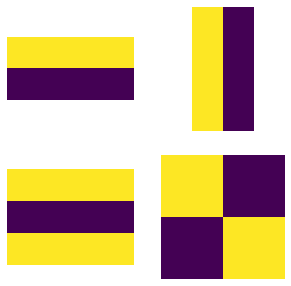

In [ ]:
# Haar features
import numpy as np
haar1 = np.array([
                  [1,1,1,1],[0,0,0,0]
                  ])
haar2 = np.array([
                  [1,0],[1,0],[1,0],[1,0]
                  ])
haar3 = np.array([
                  [1,1,1,1],[0,0,0,0],[1,1,1,1]
                  ])
haar4 = np.array([
                  [1,0],[0,1]
                  ])
haar5 = np.array([
                  [1,0,1],[1,0,1],[1,0,1],[1,0,1]
                  ])
plt.figure(figsize =(5,5))
plt.subplot(221),plt.imshow(haar1),plt.axis('off')
plt.subplot(222),plt.imshow(haar2),plt.axis('off')
plt.subplot(223),plt.imshow(haar3),plt.axis('off')
plt.subplot(224),plt.imshow(haar4),plt.axis('off')
plt.show()

# integral image

In [ ]:
def integral_image(aimg):
  x, y = aimg.shape
  Nimg = np.zeros([x,y])
  for i in range(x):
    xrow = []
    for j in range(y):
      a = aimg[:i,:j+1]
      xrow.append(aimg[i][j])
      Nimg[i][j] = sum(xrow) + np.sum(a)
    del xrow
  return Nimg
import cv2
import numpy as np


In [ ]:
img = cv2.imread('/content/drive/MyDrive/vsi2.jpg',0)
cc = integral_image(img)
def sum_window(integral_image, initx, inity,w ,h):
  #print(integral_image)

  #print(f'\nwe want a windows started at {(inity,initx)} X width and height {(w,h)} ')
  try:
    init_point = integral_image[initx, inity]
    down_right = integral_image[initx + h, inity + w]
    if initx == inity == 0:
      return down_right

    if inity == 0:
      top_right =  integral_image[initx -1, inity + w]
      return   down_right - top_right

    if initx == 0:
      down_left =  integral_image[initx + h ,inity -1]
      return down_right - down_left

    top_right =  integral_image[initx -1, inity + w]
    down_left =  integral_image[initx + h ,inity -1]
    top_left  =  integral_image[initx -1, inity-1]
    box_sum = down_right + top_left - top_right - down_left
    #print(init_point,down_right,top_right,down_left,top_left,sep = '\t')
    return box_sum
  except:
    wimage, himage = integral_image.shape
    if w + initx > wimage :
      #print('width_problem')
      return False
    if h + inity >himage:
      #print('height_problem')
      return False
cc
# sum_window(cc, 0, 0, 3, 1)

array([[  2.,   9.,   9.,  19.,  19.,  19.,  19.],
       [  2.,  10.,  20.,  31.,  38.,  38., 165.],
       [  2.,  11.,  21.,  32.,  46.,  46., 173.],
       [  2.,  11.,  21.,  32.,  46.,  46., 300.],
       [257., 266., 276., 288., 305., 305., 559.],
       [260., 270., 280., 292., 316., 316., 697.]])

In [ ]:
def haarF(img, stridex, stridey):
    w, h = img.shape
    for i in range(0, w, stridex):
        for j in range(0, h, stridey):
            t11 = sum_window(img, i, j, stridex, stridey)
            t12 = sum_window(img, i + stridex, j, stridex, stridey)
            # ---------------
            t21 = sum_window(img, i, j, stridey, stridex)
            t22 = sum_window(img, i, j + stridex, stridey, stridex)
            #print(t21, t22, t11, t12, (i, j), sep="\t")
            # ---------------
            t31 = sum_window(img, i, j, stridex, stridey)
            t32 = sum_window(img, i + stridey + 1 , j, stridex, stridey)
            t33 = sum_window(img, i + ((stridey+1) * 2), j, stridex, stridey)
            print(t31, t32, t33)
            # ---------------
            tetaTh = 0.8
            windows_size = (stridex + 1) * (stridey + 1)
#################################################################################
#################################################################################
            if t11 and t12:
                miu1 = t11 / windows_size
                miu2 = t12 / windows_size
                teta = miu1 - miu2
                if teta > tetaTh:
                    print(
                        f"type 1 haar feature in index{j,i} \tthreshold:{(tetaTh,teta)}"
                    )
#################################################################################
            if t21 and t22:
                miu1 = t21 / windows_size
                miu2 = t22 / windows_size
                teta = miu1 - miu2
                if teta > tetaTh:
                    print(
                        f"type 2 haar feature in index{j,i} \tthreshold:{(tetaTh,teta)}"
                    )
#################################################################################
            if t31 and t32 and t33:
                miu1 = t31 / windows_size
                miu2 = t32 / windows_size
                miu3 = t33 / windows_size

                teta = miu1 - miu3 + miu2
                if teta > tetaTh + .5:
                    print(
                        f"type 3 haar feature in index{j,i} \tthreshold:{(tetaTh,teta)}"
                    )


haarF(cc, 2, 1)


20.0 1.0 259.0
type 1 haar feature in index(0, 0) 	threshold:(0.8, 3.166666666666667)
29.0 1.0 2.0
type 1 haar feature in index(1, 0) 	threshold:(0.8, 4.666666666666666)
type 3 haar feature in index(1, 0) 	threshold:(0.8, 4.666666666666667)
28.0 7.0 11.0
type 1 haar feature in index(2, 0) 	threshold:(0.8, 3.5)
type 2 haar feature in index(2, 0) 	threshold:(0.8, 1.1666666666666665)
type 3 haar feature in index(2, 0) 	threshold:(0.8, 4.000000000000001)
18.0 7.0 11.0
type 1 haar feature in index(3, 0) 	threshold:(0.8, 1.8333333333333333)
type 3 haar feature in index(3, 0) 	threshold:(0.8, 2.3333333333333335)
134.0 134.0 137.0
type 3 haar feature in index(4, 0) 	threshold:(0.8, 21.833333333333332)
None None None
None None None
1.0 259.0 False
type 2 haar feature in index(0, 2) 	threshold:(0.8, 42.5)
1.0 2.0 False
7.0 11.0 False
7.0 11.0 False
134.0 137.0 False
None None False
None None False
259.0 False False
2.0 False False
11.0 False False
11.0 False False
137.0 False False
None False Fa

In [ ]:
image = cv2.imread('/content/1.jpg',0)
pixels = np.asarray(image)
pixels = pixels.astype('float32')
pixels /= 255.0
integ = integral_image(pixels)
haarF(integ,2,1)


In [ ]:
###################################
# T
###################################
import cv2
import numpy as np

a = cv2.imread('/content/drive/MyDrive/vsi2.jpg',0)
cc = integral_image(a)
cc


def haarF(img, stridex, stridey):
    w, h = img.shape
    for i in range(0, w, stridex):
        for j in range(0, h, stridey):
            t11 = sum_window(img, i, j, stridex, stridey)
            t12 = sum_window(img, i + stridex, j, stridex, stridey)
            # ---------------
            t21 = sum_window(img, i, j, stridey, stridex)
            t22 = sum_window(img, i, j + stridex, stridey, stridex)
            #print(t21, t22, t11, t12, (i, j), sep="\t")
            # ---------------
            t31 = sum_window(img, i, j, stridex, stridey)
            t32 = sum_window(img, i + stridey + 1 , j, stridex, stridey)
            t33 = sum_window(img, i + ((stridey+1) * 2), j, stridex, stridey)
            #print(t31, t32, t33)
            # ---------------
            tetaTh = 0.8
            windows_size = (stridex + 1) * (stridey + 1)
#################################################################################
#################################################################################
            if t11 and t12:
                miu1 = t11 / windows_size
                miu2 = t12 / windows_size
                teta = miu1 - miu2
                if teta > tetaTh:
                    print(
                        f"type 1 haar feature in index{j,i} \tthreshold:{(tetaTh,teta)}"
                    )
#################################################################################
            if t21 and t22:
                miu1 = t21 / windows_size
                miu2 = t22 / windows_size
                teta = miu1 - miu2
                if teta > tetaTh:
                    print(
                        f"type 2 haar feature in index{j,i} \tthreshold:{(tetaTh,teta)}"
                    )
#################################################################################
            if t31 and t32 and t33:
                miu1 = t31 / windows_size
                miu2 = t32 / windows_size
                miu3 = t33 / windows_size

                teta = miu1 - miu3 + miu2
                if teta > tetaTh + .5:
                    print(
                        f"type 3 haar feature in index{j,i} \tthreshold:{(tetaTh,teta)}"
                    )



In [ ]:
image = cv2.imread('/content/billboard.jpg',0)
pixels = np.asarray(image)
pixels = pixels.astype('float32')
pixels /= 255.0
integ = integral_image(pixels)
haarFP(integ)


In [ ]:
norm_image = (gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image))
plt.imshow(norm_image)

In [ ]:
model = AdaBoostClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

ValueError: ignored

In [ ]:
# tries - - - tries - - -tries - - - tries - - -tries - - - tries - - -
# tries - - - tries - - -tries - - - tries - - -tries - - - tries - - -
# tries - - - tries - - -tries - - - tries - - -tries - - - tries - - -
# tries - - - tries - - -tries - - - tries - - -tries - - - tries - - -

# def sum_window(integral_image, initx, inity,w ,h):
  w -= 1
  h -= 1
  wimage, himage = integral_image.shape
  if w + initx > wimage :
    return 'width_problem'
  if h + inity >himage:
    return 'height_problem'
  init_point = integral_image[initx, inity]
  down_right = integral_image[inity + h, initx + w]

  if initx == inity == 0:
    return down_right

  if inity == 0:
    down_left =  integral_image[inity + h, initx -1]
    return   down_right - down_left

  if initx == 0:
    top_right =  integral_image[inity -1, initx + w]
    return down_right - top_right

  top_right =  integral_image[inity -1, initx + w]
  down_left =  integral_image[inity + h, initx -1]
  top_left  =  integral_image[initx -1, inity-1]
  box_sum = down_right + top_left - top_right - down_left
  return box_sum
sum_window(cc, 1, 2, 3, 1)

# tries - - - tries - - -tries - - - tries - - -tries - - - tries - - -
# tries - - - tries - - -tries - - - tries - - -tries - - - tries - - -
# tries - - - tries - - -tries - - - tries - - -tries - - - tries - - -
# tries - - - tries - - -tries - - - tries - - -tries - - - tries - - -

#import cv2
#import numpy as np

def integral_image(path):
  aimg = cv2.imread(path, 0)
  print(aimg.shape)
  x, y = aimg.shape
  Nimg = np.zeros([x,y])
  bimg = aimg.T
  for i in range(x):
    xrow = []
    for j in range(y):
      #print('----   ',i,j, aimg[i][j])
      xrow.append(aimg[i][j])
      if i >= 1:
        xrow.append(aimg[i-1][j])
      Nimg[i][j] = sum(xrow)
    del xrow
  print(aimg,Nimg,sep = '\n\n')
integral_image('/content/drive/MyDrive/vsi2.jpg')

# tries - - - tries - - -tries - - - tries - - -tries - - - tries - - -
# tries - - - tries - - -tries - - - tries - - -tries - - - tries - - -
# tries - - - tries - - -tries - - - tries - - -tries - - - tries - - -

initx = 1
inity = 1
w = 2
h = 0

init_point = cc[initx, inity]
down_right = cc[inity + h, initx + w]
top_right = cc[inity -1, initx + w]
b_l = cc[inity + h, initx -1]
t_l =cc[initx -1, inity-1]

box_sum = down_right + t_l - top_right - b_l
print(f'{box_sum} \n in {init_point} ,   dR {down_right} ,  TR {top_right}   {b_l} {t_l}')

def haarF(img):
  w, h = img.shape
  for i in range(0,w,2):
    for j in range(0,h,2):
      summ1 = sum_window(img,i,j,2,0)
      summ2 = sum_window(img,i+1,j,2,0)

      type2sum1 = sum_window(img,i,j,0,2)
      type2sum2 = sum_window(img,i,j+1,0,2)

      tetaTh = 0.4
      windows_size = 3
      if summ1 and summ2:
        miu1 = summ1 / windows_size
        miu2 = summ2 / windows_size
        teta = miu1 - miu2 
        if teta > tetaTh:
          print(f'found type 1 haar feature in index{j,i} ',summ1,summ2,teta,sep = '\t',end = '\n\n')
      if type2sum1 and type2sum2:
        miu1 = type2sum1 / windows_size
        miu2 = type2sum2 / windows_size
        teta = miu1 - miu2 
        if teta > tetaTh:
          print(f'found type 2 haar feature: in index{j,i} ',type2sum1,type2sum2,teta,sep = '\t',end = '\n\n')

def haarA(img):
  w, h = img.shape
  for i in range(0,w,2):
    for j in range(0,h,2):
      summ1 = sum_window(img,i,j,2,0)
      summ2 = sum_window(img,i+1,j,2,0)

      type2sum1 = sum_window(img,i,j,0,2)
      type2sum2 = sum_window(img,i,j+1,0,2)
      print(i, j, type2sum1)
      print(i, j+1, type2sum2)
      print('----')


      tetaTh = 0.7
      windows_size = 3
      if summ1 and summ2:
        miu1 = summ1 / windows_size
        miu2 = summ2 / windows_size
        teta = miu1 - miu2 
        if teta > tetaTh:
          print('found type 1 haar feature: ',i,j,summ1,summ2,teta,sep = '\t',end = '\n\n')
      if type2sum1 and type2sum2:
        miu1 = type2sum1 / windows_size
        print(type2sum2,windows_size)
        miu2 = type2sum2 / windows_size
        teta = miu1 - miu2 
        if teta > tetaTh:
          print(f'found type 2 haar feature: in index{i,j} ',type2sum1,type2sum2,teta,sep = '\t',end = '\n\n')      
haarA(cc)

8.0

In [ ]:
def sum_window(integral_image, initx, inity,w ,h):
  #print(integral_image)

  #print(f'\nwe want a windows started at {(inity,initx)} X width and height {(w,h)} ')
  try:
    init_point = integral_image[initx, inity]
    down_right = integral_image[initx + h, inity + w]
    if initx == inity == 0:
      return down_right

    if inity == 0:
      top_right =  integral_image[initx -1, inity + w]
      return   down_right - top_right

    if initx == 0:
      down_left =  integral_image[initx + h ,inity -1]
      return down_right - down_left

    top_right =  integral_image[initx -1, inity + w]
    down_left =  integral_image[initx + h ,inity -1]
    top_left  =  integral_image[initx -1, inity-1]
    box_sum = down_right + top_left - top_right - down_left
    #print(init_point,down_right,top_right,down_left,top_left,sep = '\t')
    return box_sum
  except:
    wimage, himage = integral_image.shape
    if w + initx > wimage :
      #print('width_problem')
      return False
    if h + inity >himage:
      #print('height_problem')
      return False

in drawF1
    stp1 = self.what[0][:2][0]
    stp2 = self.what[0][:2][1]
    cv2.rectangle(copy_img,pt1 = (stp1,stp2), pt2 = (stp1 +sty, stp2 +stx), color=(0,0,0), thickness=1)

    stp1 = self.what2[0][:2][0]
    stp2 = self.what2[0][:2][1]
    cv2.rectangle(copy_img,pt1 = (stp1,stp2), pt2 = (stp1 +stx, stp2 +sty), color=(255,0,0), thickness=1)